In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import requests as req
from bs4 import BeautifulSoup
import seaborn as sns
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

**Dataframe Loading**

The *com_eat* DataFrame gathers the mediane of the `HygieneScores` of all the inspections for each `Community Area` per `Year`.

In [2]:
com_eat = pd.read_csv('Eat_Year_CommArea.csv',sep=',') #creation of the dataframe

In [3]:
com_eat['Community Area'] = com_eat['Community Area'].apply(str)

In [4]:
com_eat = com_eat.drop(0)
com_eat = com_eat.drop(columns='Unnamed: 0')

In [5]:
com_eat.head()

Community Area  2010  2011  2012  2013  2014  2015  2016  2017  2018  2019
1            1.0   5.0   6.0   6.0   4.0   3.0   4.0   6.0   4.0   6.0  14.0
2            2.0   6.0   5.0   4.5   5.0   4.0   5.0   5.0   4.0  10.0  10.0
3            3.0   5.0   6.0   3.0   4.0   4.0   3.0   5.0   4.0   8.5  10.0
4            4.0   6.5   5.0   4.0   6.0   5.0   3.0   3.0   4.0   6.0  16.0
5            5.0   3.0   6.0   5.0   4.0   3.0   4.0   3.0   3.0   6.5   8.0

**General Visualization**

The following figure allows to visualize the `HygieneScores` per `Year` for each `Community Area`. It is possible to unselect the year we don't want to display clicking on its label on the right of the figure.

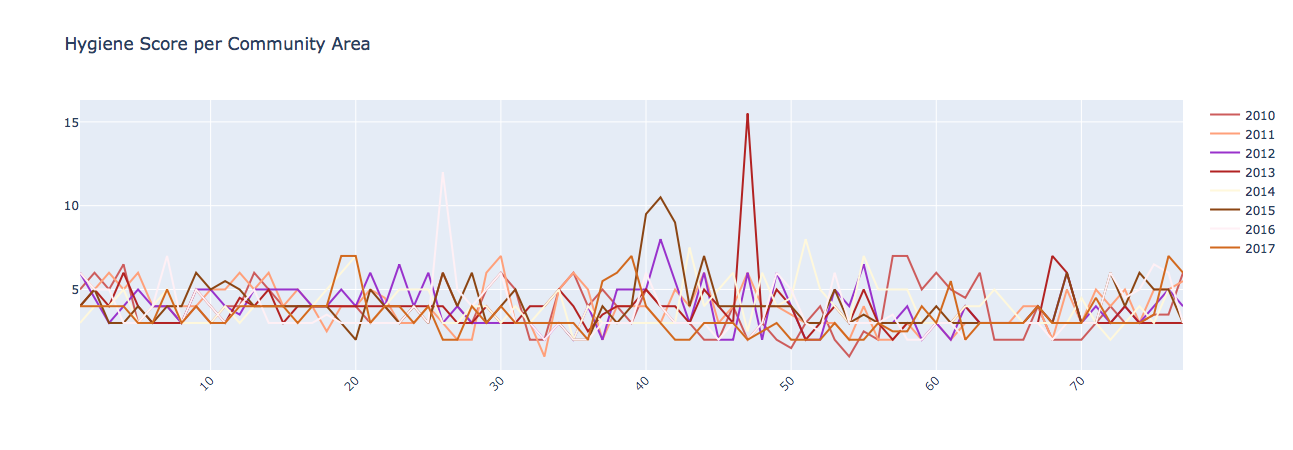

In [6]:
commarea = com_eat['Community Area']

fig = go.Figure()
colorlist = ('indianred', 'lightsalmon', 'darkorchid', 'firebrick', 'cornsilk', 'saddlebrown', 'lavenderblush', 'chocolate')
c = 0
for x in range(2010, 2018) :
    x = str(x)
    fig.add_trace(go.Scatter(x=commarea, y=com_eat[x], name=x, marker_color=colorlist[c]))
    c += 1
    
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(title_text='Hygiene Score per Community Area')

fig.show()

**Visualization Year By Year**

The following figure allows to visualize the results in the ascending order - from top to bottom : the top `Community Areas` have the best `HygieneScore` (the *lowest*).

In [7]:
com_eat2010 = com_eat.sort_values(by=['2010'], ascending=False)

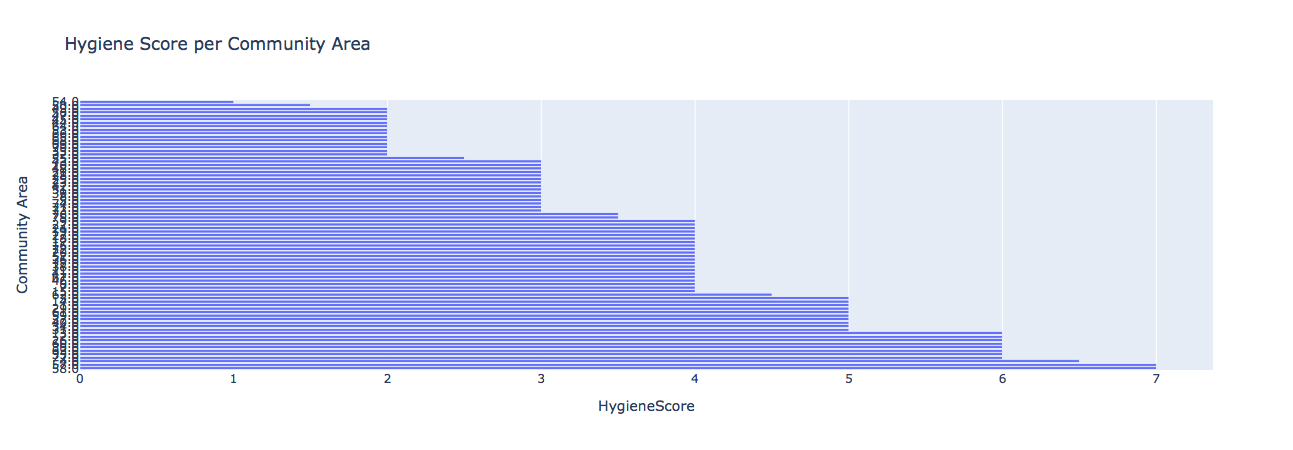

In [8]:
commarea = com_eat2010['Community Area']
fig = go.Figure(go.Bar(x=com_eat2010['2010'], y=commarea, orientation='h'))

fig.update_layout(title_text='Hygiene Score per Community Area', barmode='stack',\
                  yaxis=dict(type='category', title='Community Area', tickmode='linear'), xaxis=dict(title='HygieneScore'))

fig.show()

In [9]:
crime = pd.read_csv('Crime_Year_CommArea.csv',sep=',') #creation of the dataframe

In [10]:
crime = crime.drop(0)
crime = crime.drop(columns='Unnamed: 0')

In [11]:
crime.head()

Community Area    2010    2011    2012    2013    2014    2015    2016  \
1             1.0  3572.3  3329.1  2874.9  2447.0  2262.3  2196.0  2380.6   
2             2.0  3975.1  3584.9  3170.7  2526.7  2440.4  2238.1  2497.2   
3             3.0  2884.2  2849.6  3032.2  2244.6  1917.7  2222.5  2110.1   
4             4.0  1851.2  1679.5  1767.3  1529.3  1173.1  1037.9  1274.5   
5             5.0  1592.9  1701.6  1664.4  1379.3  1145.8   958.6   937.3   

    2017  
1   86.0  
2  158.2  
3  120.2  
4   54.1  
5   30.7

In [12]:
crime['Community Area'] = crime['Community Area'].apply(str)

**General Visualization**

The following figure allows to visualize the `CrimeScores` per `Year` for each `Community Area`. It is possible to unselect the year we don't want to display clicking on its label on the right of the figure.

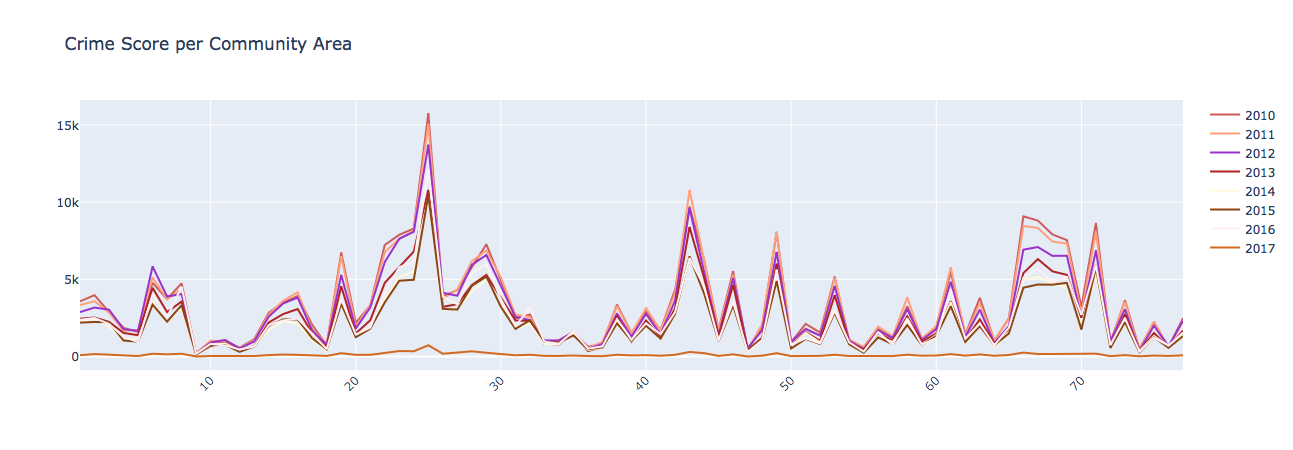

In [13]:
commarea = crime['Community Area']

fig = go.Figure()
colorlist = ('indianred', 'lightsalmon', 'darkorchid', 'firebrick', 'cornsilk', 'saddlebrown', 'lavenderblush', 'chocolate')
c = 0
for x in range(2010, 2018) :
    x = str(x)
    fig.add_trace(go.Scatter(x=commarea, y=crime[x], name=x, marker_color=colorlist[c]))
    c += 1
    
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)

fig.update_layout(title_text='Crime Score per Community Area')

fig.show()

**Visualization Year By Year**

The following figure allows to visualize the results in the descending order : the top `Community Areas` have the best `CrimeScore` (the *lowest*).

In [14]:
crime2010 = crime.sort_values(by=['2010'], ascending=False)

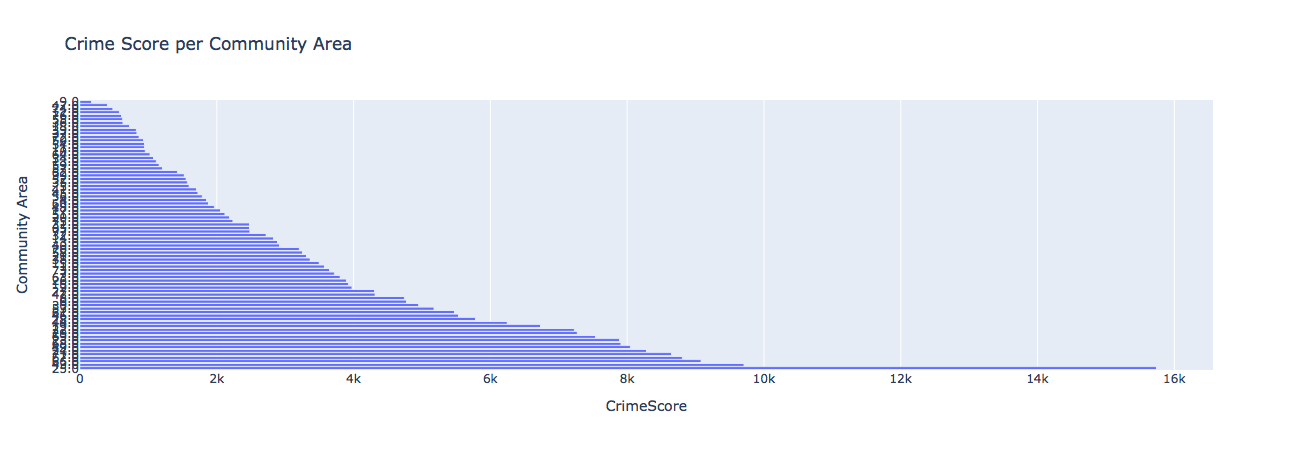

In [15]:
commarea = crime2010['Community Area']
fig = go.Figure(go.Bar(x=crime2010['2010'], y=commarea, orientation='h'))

fig.update_layout(title_text='Crime Score per Community Area', barmode='stack',\
                  yaxis=dict(type='category', title='Community Area', tickmode='linear'), xaxis=dict(title='CrimeScore'))

fig.show()

**Visualization using a Double Y axis**


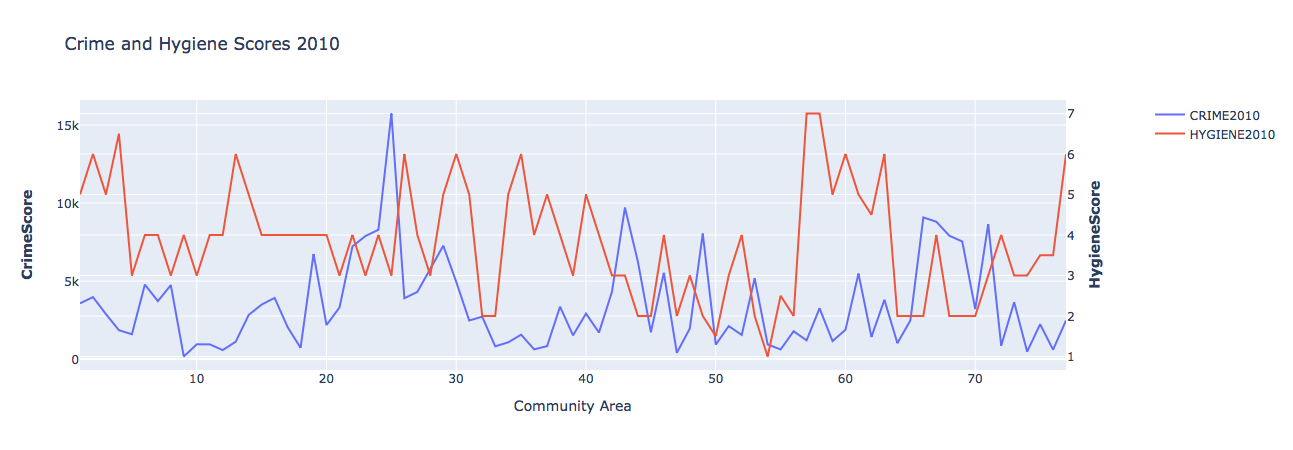

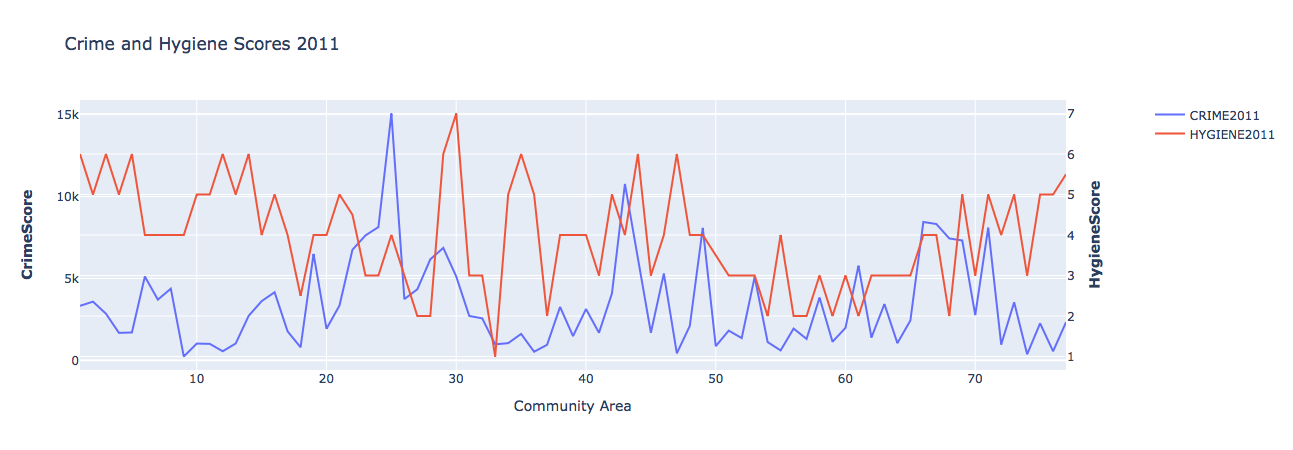

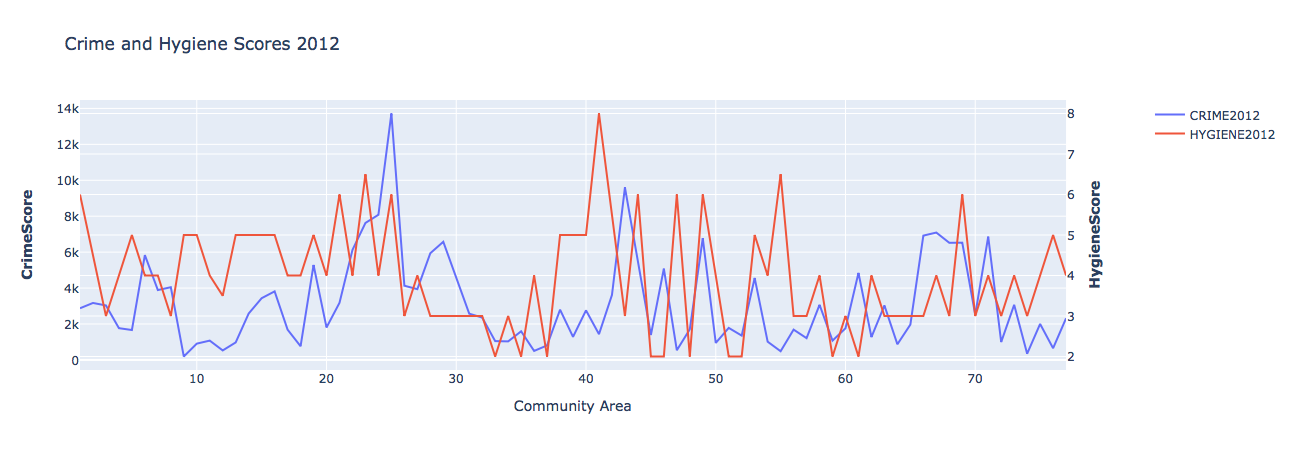

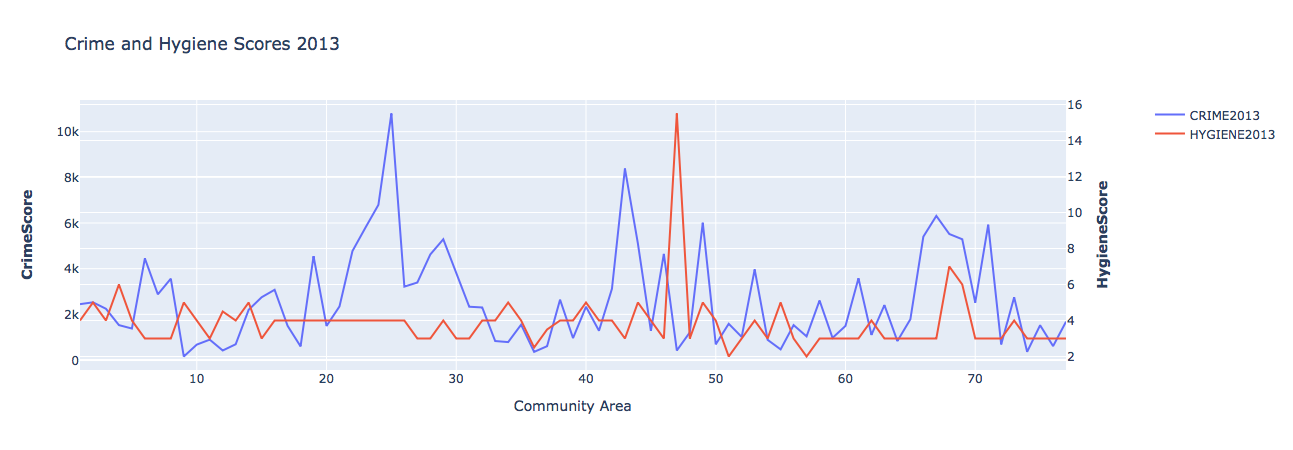

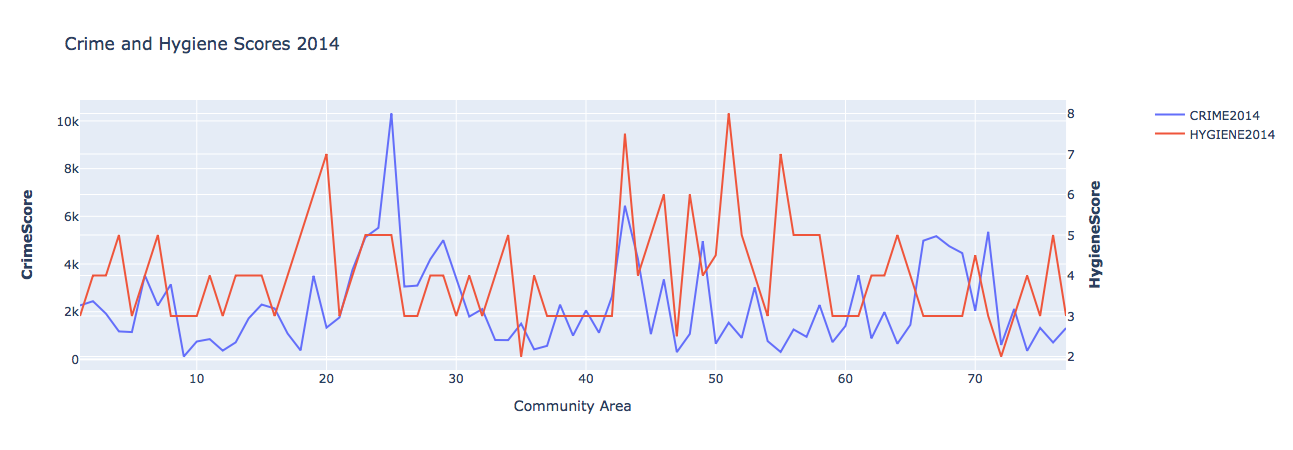

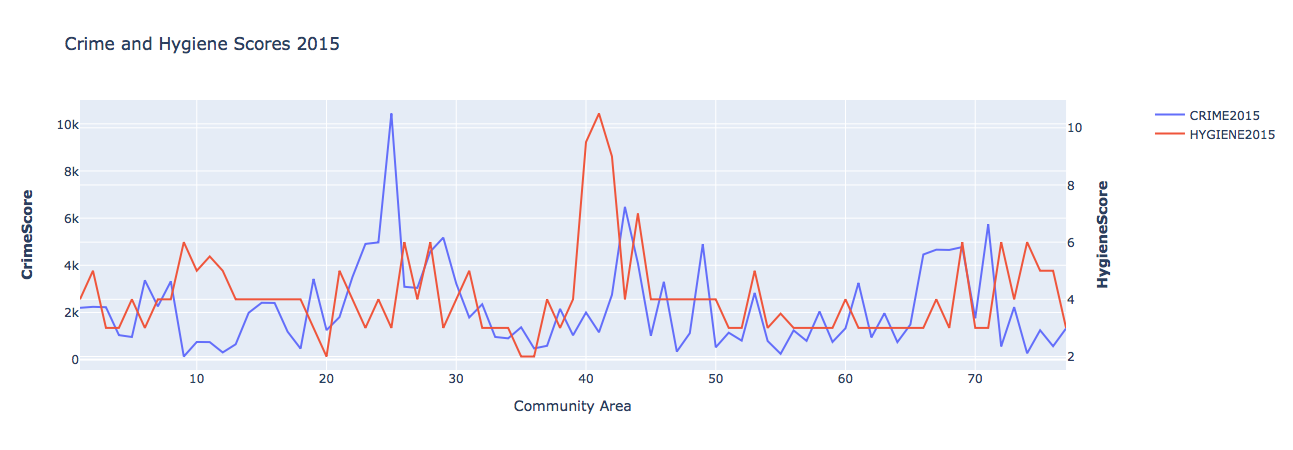

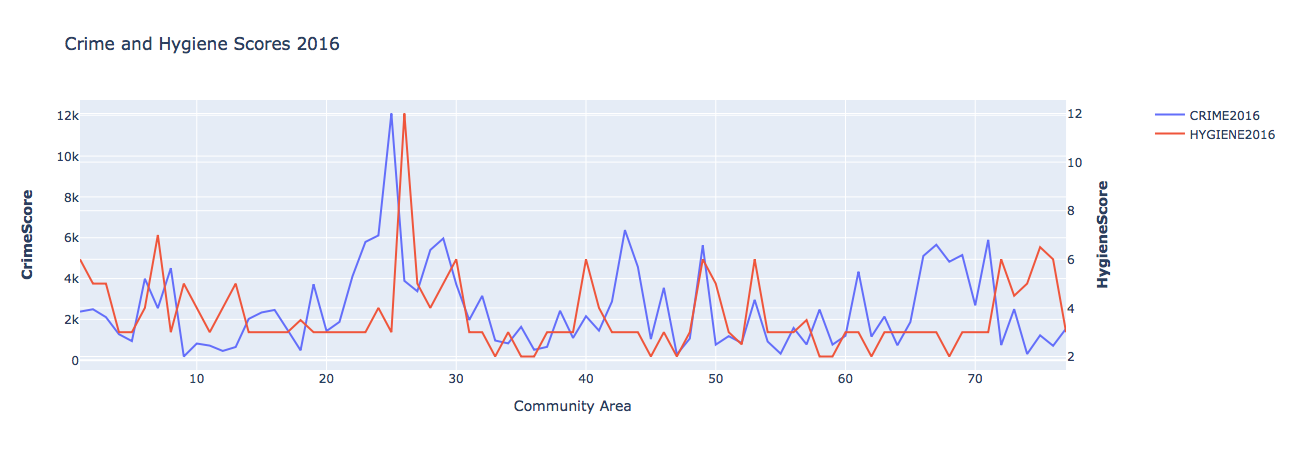

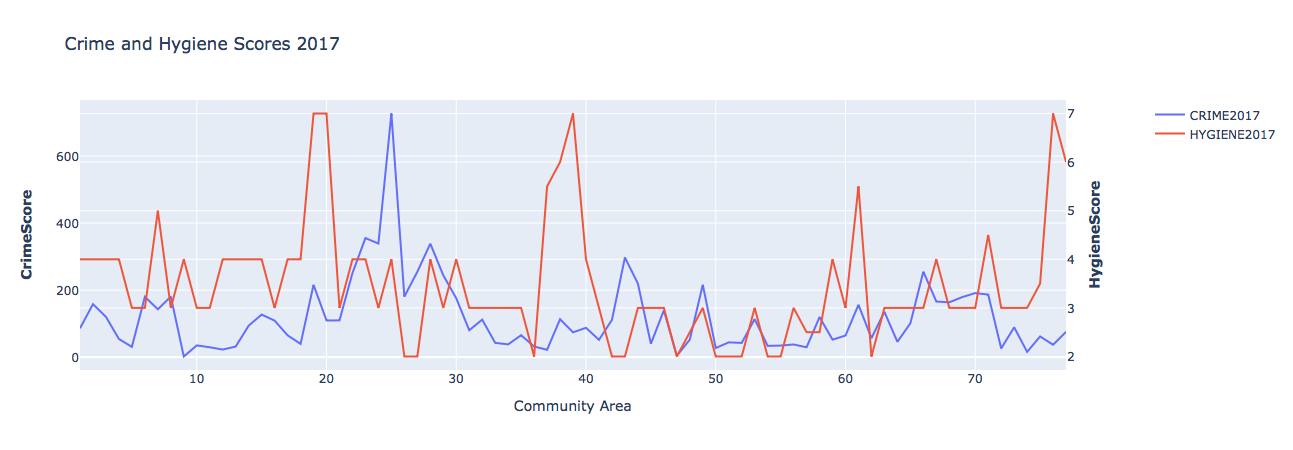

In [19]:
for n in range(2010, 2018) :
    n = str(n)
    
    # Create figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(go.Scatter(x=crime['Community Area'], y=crime[n], name="CRIME" + n), secondary_y=False,)

    fig.add_trace(go.Scatter(x=com_eat['Community Area'], y=com_eat[n], name="HYGIENE" + n), secondary_y=True,)

    # Add figure title
    fig.update_layout(title_text="Crime and Hygiene Scores " + n)

    # Set x-axis title
    fig.update_xaxes(title_text="Community Area")

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>CrimeScore</b>", secondary_y=False)
    fig.update_yaxes(title_text="<b>HygieneScore</b>", secondary_y=True)

    fig.show()